In [13]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np


In [14]:
from src.battery import Battery
from src.optimize import run_simulation
from src.load_data import load_data
from src.plot import display_schedule, display_profit

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)




# Battery specs :



- SOC: practical state of charge in [0,1] 
- NEC: practical nominal energy capacity (Wh)
- CR: Charging rate (W/Wh)
- DR: Discharging rate (W/Wh)





In [15]:
SOC = np.array([0, 0.01, 0.85, 1.])

# Charging curve
CR = np.array([0.25, 0.5, 0.5, 0.1])

SOC_to_CR_function = interp1d(SOC, CR)

# Discharging curve
SOC = np.array([0., 0.15, 0.99, 1.])
DR = np.array([0.1, 0.5, 0.5, 0.25])

SOC_to_DR_function = interp1d(SOC, DR)

bat = Battery(SOC_to_CR_function, SOC_to_DR_function)


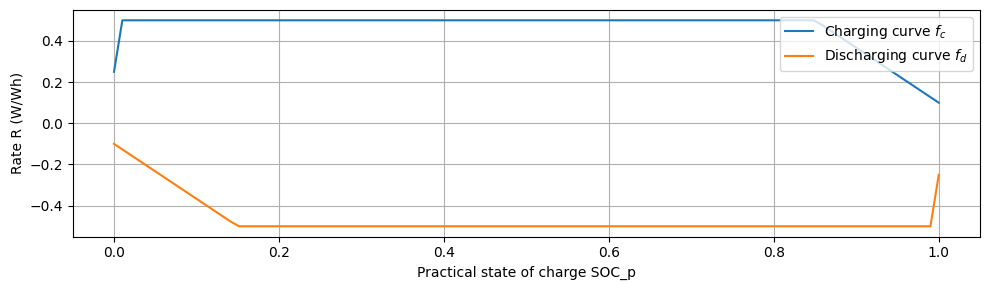

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, 1, 100), SOC_to_CR_function(np.linspace(0, 1, 100)), label="Charging curve $f_c$")
plt.plot(np.linspace(0, 1, 100), -SOC_to_DR_function(np.linspace(0,1, 100)), label="Discharging curve $f_d$")
plt.grid(True)
plt.xlabel("Practical state of charge SOC_p")
plt.ylabel("Rate R (W/Wh)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('out/charging_curve.pdf')
plt.show()


# Compute max SOC change in one hour of charge/ discharge

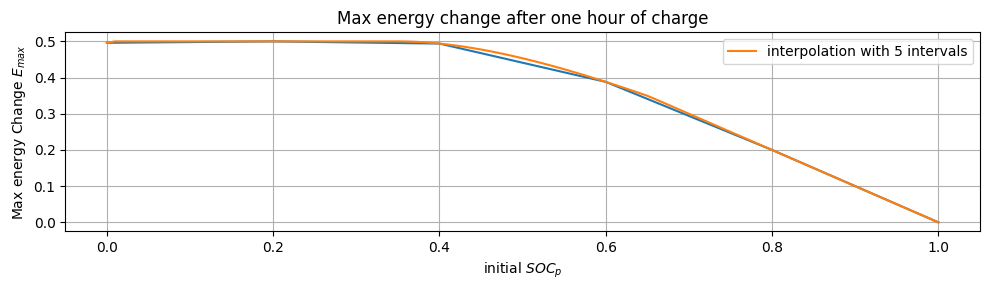

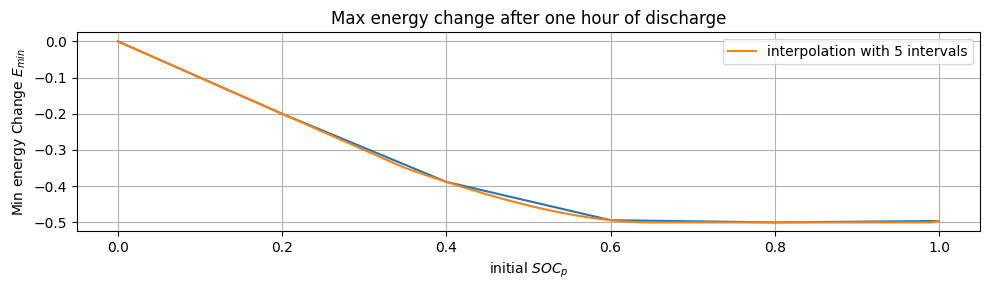

In [17]:
Nint = 5
G_c, G_d = bat.get_max_SOC_change(Nint)


Nint2 = 100
G_c2, G_d2 = bat.get_max_SOC_change(Nint2)

plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_c)
plt.plot(np.linspace(0, 1, Nint2+1), G_c2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Max energy Change $E_{max}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of charge")
plt.legend()
plt.tight_layout()
plt.savefig("out/max_energy_change.pdf")
plt.show()


plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_d)
plt.plot(np.linspace(0, 1, Nint2+1), G_d2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Min energy Change $E_{min}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of discharge")
plt.legend()
plt.tight_layout()
plt.savefig("out/min_energy_change.pdf")
plt.show()


# Dataset :

In [18]:
df = load_data(country="Germany",
               start="2022-01-01 00:00:00",
               end="2023-01-01 00:00:00")
df


Country ISO3 Code           timestamp     Datetime (Local)  \
396672  Germany       DEU 2022-01-01 00:00:00  2022-01-01 01:00:00   
396673  Germany       DEU 2022-01-01 01:00:00  2022-01-01 02:00:00   
396674  Germany       DEU 2022-01-01 02:00:00  2022-01-01 03:00:00   
396675  Germany       DEU 2022-01-01 03:00:00  2022-01-01 04:00:00   
396676  Germany       DEU 2022-01-01 04:00:00  2022-01-01 05:00:00   
...         ...       ...                 ...                  ...   
405427  Germany       DEU 2022-12-31 19:00:00  2022-12-31 20:00:00   
405428  Germany       DEU 2022-12-31 20:00:00  2022-12-31 21:00:00   
405429  Germany       DEU 2022-12-31 21:00:00  2022-12-31 22:00:00   
405430  Germany       DEU 2022-12-31 22:00:00  2022-12-31 23:00:00   
405431  Germany       DEU 2022-12-31 23:00:00  2023-01-01 00:00:00   

        price_euros_wh       vgc  fgc  
396672        0.000041  0.000005    0  
396673        0.000043  0.000005    0  
396674        0.000045  0.000005    0  
396675        0.000038  0.000005    0  
396676        0.000040  0.000005    0  
...                ...       ...  ...  
405427        0.000023  0.000005    0  
405428       -0.000001  0.000005    0  
405429       -0.000001  0.000005    0  
405430        0.000025  0.000005    0  
405431       -0.000005  0.000005    0  

[8760 rows x 7 columns]

# Get Schedule with forecasted prices :

In [19]:
frame_size_forecast = 30
update_period = 1

df_pred = run_simulation(bat,
                        df,
                        forecasted=True,
                        frame_size=frame_size_forecast,
                        update_period=update_period,
                        start = 30
                        )


Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 96.91553664
758 simplex iterations
1 branching nodes
absmipgap=1.87299e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 100.3289701
745 simplex iterations
1 branching nodes
absmipgap=2.24674e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 101.3166557
772 simplex iterations
1 branching nodes
absmipgap=2.15437e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.1625557
723 simplex iterations
1 branching nodes
absmipgap=1.37845e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.5475949
747 simplex iterations
1 branching nodes
absmipgap=1.63709e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.4232342
778 simplex iterations
1 branching nodes
absmipgap=1.58025e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 102.7472262
1265 simplex iterations
1 branching nodes
absmipgap=8.18545e-

In [20]:
display_schedule(df_pred)
display_profit(df_pred)


In [21]:
df_pred

Country ISO3 Code           timestamp     Datetime (Local)  \
397392  Germany       DEU 2022-01-31 00:00:00  2022-01-31 01:00:00   
397393  Germany       DEU 2022-01-31 01:00:00  2022-01-31 02:00:00   
397394  Germany       DEU 2022-01-31 02:00:00  2022-01-31 03:00:00   
397395  Germany       DEU 2022-01-31 03:00:00  2022-01-31 04:00:00   
397396  Germany       DEU 2022-01-31 04:00:00  2022-01-31 05:00:00   
...         ...       ...                 ...                  ...   
405427  Germany       DEU 2022-12-31 19:00:00  2022-12-31 20:00:00   
405428  Germany       DEU 2022-12-31 20:00:00  2022-12-31 21:00:00   
405429  Germany       DEU 2022-12-31 21:00:00  2022-12-31 22:00:00   
405430  Germany       DEU 2022-12-31 22:00:00  2022-12-31 23:00:00   
405431  Germany       DEU 2022-12-31 23:00:00  2023-01-01 00:00:00   

        price_euros_wh       vgc  fgc    n_cycles       eff             NEC  \
397392        0.000110  0.000005    0    0.000000  0.990000  1000000.000000   
397393        0.000105  0.000005    0    0.000000  0.990000  1000000.000000   
397394        0.000100  0.000005    0    0.000000  0.990000  1000000.000000   
397395        0.000100  0.000005    0    0.000000  0.990000  1000000.000000   
397396        0.000135  0.000005    0    0.000000  0.990000  1000000.000000   
...                ...       ...  ...         ...       ...             ...   
405427        0.000023  0.000005    0  642.462174  0.958198   967876.891298   
405428       -0.000001  0.000005    0  642.462174  0.958198   967876.891298   
405429       -0.000001  0.000005    0  642.462174  0.958198   967876.891298   
405430        0.000025  0.000005    0  642.462174  0.958198   967876.891298   
405431       -0.000005  0.000005    0  642.462174  0.958198   967876.891298   

        price_forecast      schedule      capacity           SOC  \
397392        0.000128 -9.956958e-09  0.000000e+00  0.000000e+00   
397393        0.000124  1.001172e-08 -9.956958e-09 -9.956958e-13   
397394        0.000119  4.960889e+05  5.475956e-11  5.475956e-15   
397395        0.000119  4.430703e+05  4.960889e+05  4.960889e+01   
397396        0.000128  6.084078e+04  9.391592e+05  9.391592e+01   
...                ...           ...           ...           ...   
405427        0.000306 -9.982614e-09 -2.026456e-06 -2.093713e-10   
405428        0.000272 -1.001172e-08 -2.036439e-06 -2.104027e-10   
405429        0.000277 -1.001172e-08 -2.046450e-06 -2.114371e-10   
405430        0.000223  1.509850e-08 -2.056462e-06 -2.124715e-10   
405431        0.000193  0.000000e+00 -2.041364e-06 -2.109115e-10   

        charge_energy  discharge_energy  electricity_revenue     grid_cost  \
397392   0.000000e+00      9.857389e-09         1.085988e-12  4.928694e-14   
397393   1.001172e-08     -0.000000e+00        -1.054234e-12 -5.005859e-14   
397394   4.960889e+05     -0.000000e+00        -4.960889e+01 -2.480445e+00   
397395   4.430703e+05     -0.000000e+00        -4.436463e+01 -2.215352e+00   
397396   6.084078e+04     -0.000000e+00        -8.237842e+00 -3.042039e-01   
...               ...               ...                  ...           ...   
405427   0.000000e+00      9.565322e-09         2.206720e-13  4.782661e-14   
405428   0.000000e+00      9.593209e-09        -9.976937e-15  4.796605e-14   
405429   0.000000e+00      9.593209e-09        -1.026473e-14  4.796605e-14   
405430   1.509850e-08     -0.000000e+00        -3.827471e-13 -7.549251e-14   
405431   0.000000e+00     -0.000000e+00         0.000000e+00  0.000000e+00   

        hourly_profit  
397392   1.036702e-12  
397393  -1.004175e-12  
397394  -4.712845e+01  
397395  -4.214928e+01  
397396  -7.933638e+00  
...               ...  
405427   1.728454e-13  
405428  -5.794298e-14  
405429  -5.823078e-14  
405430  -3.072545e-13  
405431   0.000000e+00  

[8040 rows x 19 columns]

# Get Schedule with true prices :

In [22]:
df_optim = run_simulation(bat,
                        df,
                        forecasted=False,
                        start = frame_size_forecast,
                        )


Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 177.269167
794 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 72.15562379
223 simplex iterations
1 branching nodes
absmipgap=2.0421e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 243.6536915
1867 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 79.40612751
685 simplex iterations
1 branching nodes
absmipgap=2.7697e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 77.96774035
1113 simplex iterations
1 branching nodes
absmipgap=5.96287e-11, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 122.2826376
641 simplex iterations
1 branching nodes
absmipgap=4.39115e-12, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 120.3247492
670 simplex iterations
1 branching nodes
absmipgap=1.86162e-12, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective

In [23]:
display_schedule(df_optim)
display_profit(df_optim)


In [24]:
df_optim

Country ISO3 Code           timestamp     Datetime (Local)  \
397392  Germany       DEU 2022-01-31 00:00:00  2022-01-31 01:00:00   
397393  Germany       DEU 2022-01-31 01:00:00  2022-01-31 02:00:00   
397394  Germany       DEU 2022-01-31 02:00:00  2022-01-31 03:00:00   
397395  Germany       DEU 2022-01-31 03:00:00  2022-01-31 04:00:00   
397396  Germany       DEU 2022-01-31 04:00:00  2022-01-31 05:00:00   
...         ...       ...                 ...                  ...   
405427  Germany       DEU 2022-12-31 19:00:00  2022-12-31 20:00:00   
405428  Germany       DEU 2022-12-31 20:00:00  2022-12-31 21:00:00   
405429  Germany       DEU 2022-12-31 21:00:00  2022-12-31 22:00:00   
405430  Germany       DEU 2022-12-31 22:00:00  2022-12-31 23:00:00   
405431  Germany       DEU 2022-12-31 23:00:00  2023-01-01 00:00:00   

        price_euros_wh       vgc  fgc    n_cycles       eff             NEC  \
397392        0.000110  0.000005    0    0.000000  0.990000  1000000.000000   
397393        0.000105  0.000005    0    0.000000  0.990000  1000000.000000   
397394        0.000100  0.000005    0    0.000000  0.990000  1000000.000000   
397395        0.000100  0.000005    0    0.000000  0.990000  1000000.000000   
397396        0.000135  0.000005    0    0.000000  0.990000  1000000.000000   
...                ...       ...  ...         ...       ...             ...   
405427        0.000023  0.000005    0  718.077466  0.954455   964096.126706   
405428       -0.000001  0.000005    0  718.077466  0.954455   964096.126706   
405429       -0.000001  0.000005    0  718.077466  0.954455   964096.126706   
405430        0.000025  0.000005    0  718.077466  0.954455   964096.126706   
405431       -0.000005  0.000005    0  718.077466  0.954455   964096.126706   

        price_forecast      schedule      capacity           SOC  \
397392        0.000110 -5.011718e-09  0.000000e+00  0.000000e+00   
397393        0.000105  1.019180e+05 -5.011718e-09 -5.011718e-13   
397394        0.000100  4.980820e+05  1.019180e+05  1.019180e+01   
397395        0.000100  3.880999e+05  6.000000e+05  6.000000e+01   
397396        0.000135  1.190005e+04  9.880999e+05  9.880999e+01   
...                ...           ...           ...           ...   
405427        0.000023 -4.820481e+05  7.712760e+05  7.999991e+01   
405428       -0.000001  1.001172e-08  2.892279e+05  2.999991e+01   
405429       -0.000001  2.892288e+05  2.892279e+05  2.999991e+01   
405430        0.000025 -4.761696e+05  5.784568e+05  5.999991e+01   
405431       -0.000005 -1.022881e+05  1.022872e+05  1.060964e+01   

        charge_energy  discharge_energy  electricity_revenue     grid_cost  \
397392   0.000000e+00      4.961601e-09         5.466195e-13  2.480800e-14   
397393   1.019180e+05     -0.000000e+00        -1.073197e+01 -5.095902e-01   
397394   4.980820e+05     -0.000000e+00        -4.980820e+01 -2.490410e+00   
397395   3.880999e+05     -0.000000e+00        -3.886045e+01 -1.940500e+00   
397396   1.190005e+04     -0.000000e+00        -1.611267e+00 -5.950025e-02   
...               ...               ...                  ...           ...   
405427   0.000000e+00      4.600933e+05         1.061435e+01  2.300466e+00   
405428   1.001172e-08     -0.000000e+00         1.041219e-14 -5.005859e-14   
405429   2.892288e+05     -0.000000e+00         3.094749e-01 -1.446144e+00   
405430   0.000000e+00      4.544825e+05         1.152113e+01  2.272413e+00   
405431   0.000000e+00      9.762937e+04        -5.047439e-01  4.881469e-01   

        hourly_profit  
397392   5.218115e-13  
397393  -1.022238e+01  
397394  -4.731779e+01  
397395  -3.691995e+01  
397396  -1.551767e+00  
...               ...  
405427   8.313885e+00  
405428   6.047077e-14  
405429   1.755619e+00  
405430   9.248720e+00  
405431  -9.928907e-01  

[8040 rows x 19 columns]